# Download data etc

In [ ]:
# Import libraries
import os
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn import metrics
%matplotlib inline

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"theodoreadriano","key":"80f1dbc9f9eb593f187985ca3b74bec5"}'}

In [ ]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Restart dataset
shutil.rmtree('/content/validation_face')
shutil.rmtree('/content/real_and_fake_face_detection')
shutil.rmtree('/content/real_and_fake_face')
shutil.rmtree('/content/real_vs_fake')

In [ ]:
!kaggle datasets download -d ciplab/real-and-fake-face-detection
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

 97% 420M/431M [00:03<00:00, 108MB/s] 
100% 431M/431M [00:03<00:00, 116MB/s]
100% 3.74G/3.75G [01:21<00:00, 56.9MB/s]
100% 3.75G/3.75G [01:21<00:00, 49.3MB/s]


In [ ]:
!kaggle datasets download -d rkuo2000/cartoon-faces

 79% 28.0M/35.6M [00:00<00:00, 52.8MB/s]
100% 35.6M/35.6M [00:00<00:00, 90.1MB/s]


In [ ]:
!unzip /content/real-and-fake-face-detection.zip
!unzip /content/140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [ ]:
!unzip /content/cartoon-faces.zip

Archive:  /content/cartoon-faces.zip
  inflating: cartoon-faces/Cartoons_00002_01.jpg  
  inflating: cartoon-faces/Cartoons_00003_01.jpg  
  inflating: cartoon-faces/Cartoons_00004_01.jpg  
  inflating: cartoon-faces/Cartoons_00006_01.jpg  
  inflating: cartoon-faces/Cartoons_00007_01.jpg  
  inflating: cartoon-faces/Cartoons_00010_01.jpg  
  inflating: cartoon-faces/Cartoons_00011_01.jpg  
  inflating: cartoon-faces/Cartoons_00012_01.jpg  
  inflating: cartoon-faces/Cartoons_00012_02.jpg  
  inflating: cartoon-faces/Cartoons_00012_03.jpg  
  inflating: cartoon-faces/Cartoons_00012_04.jpg  
  inflating: cartoon-faces/Cartoons_00013_01.jpg  
  inflating: cartoon-faces/Cartoons_00013_02.jpg  
  inflating: cartoon-faces/Cartoons_00015_01.jpg  
  inflating: cartoon-faces/Cartoons_00015_02.jpg  
  inflating: cartoon-faces/Cartoons_00015_03.jpg  
  inflating: cartoon-faces/Cartoons_00015_04.jpg  
  inflating: cartoon-faces/Cartoons_00015_05.jpg  
  inflating: cartoon-faces/Cartoons_00015_06.

UTKFace : https://susanqq.github.io/UTKFace/

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cp '/content/drive/MyDrive/UTKface_Aligned&cropped/UTKFace.tar.gz' /content/UTKFace.tar.gz
!cp '/content/drive/MyDrive/UTKface_Aligned&cropped/crop_part1.tar.gz' /content/crop_part1.tar.gz

In [ ]:
!tar -xvzf /content/UTKFace.tar.gz

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [ ]:
!tar -xvzf '/content/crop_part1.tar.gz'

Streaming output truncated to the last 5000 lines.
crop_part1/14_0_0_20170110224441502.jpg.chip.jpg
crop_part1/62_0_2_20170104212649180.jpg.chip.jpg
crop_part1/24_1_3_20170104222905601.jpg.chip.jpg
crop_part1/43_0_1_20170104185752431.jpg.chip.jpg
crop_part1/18_1_4_20170103222943622.jpg.chip.jpg
crop_part1/29_1_4_20170103230119816.jpg.chip.jpg
crop_part1/1_0_2_20161219212648582.jpg.chip.jpg
crop_part1/2_0_2_20161219222111287.jpg.chip.jpg
crop_part1/65_0_0_20170111203730182.jpg.chip.jpg
crop_part1/24_1_3_20170104222402975.jpg.chip.jpg
crop_part1/13_0_0_20170110225438328.jpg.chip.jpg
crop_part1/24_0_0_20170104165239658.jpg.chip.jpg
crop_part1/47_1_0_20170109132641773.jpg.chip.jpg
crop_part1/2_1_2_20161219162336446.jpg.chip.jpg
crop_part1/21_0_4_20161223214827816.jpg.chip.jpg
crop_part1/60_0_0_20170109013457906.jpg.chip.jpg
crop_part1/68_1_0_20170110175345439.jpg.chip.jpg
crop_part1/52_1_0_20170110143721250.jpg.chip.jpg
crop_part1/28_1_1_20170103225945785.jpg.chip.jpg
crop_part1/5_1_1_2016

In [ ]:
dest_dir = '/content/real_vs_fake/real-vs-fake/'

# Filter images from UTKFace and crop_part1
utkface_list = sorted(os.listdir('/content/UTKFace'))
crop_list = sorted(os.listdir('/content/crop_part1'))
utkface_filtered = []
crop_filtered = []

for face in utkface_list : 
    if face.split('_')[2] in ['1','2','3','4'] : 
        # print(face)
        utkface_filtered.append(face)
    # print(face.split('_')[2])

for face in crop_list : 
    if face.split('_')[2] in ['1','2','3','4'] : 
        crop_filtered.append(face)

print(f'# utkface : {len(utkface_filtered)}')
print(f'# cropface : {len(crop_filtered)}')

# Add to training data and validation data

for img_name in utkface_filtered : 
    if not os.path.isfile(dest_dir + 'train/real/' + img_name) : 
        shutil.copy('/content/UTKFace/' + img_name, dest_dir + 'train/real/' + img_name)

for img_name in crop_filtered : 
    if not os.path.isfile(dest_dir + 'valid/real/' + img_name) : 
        shutil.copy('/content/crop_part1/' + img_name, dest_dir + 'valid/real/' + img_name)

# utkface : 13627
# cropface : 4513


In [ ]:
# Plot all the images in the training set
from PIL import Image, ImageOps
train_real_dir = '/content/real_vs_fake/real-vs-fake/train/real/'
train_real = os.listdir('/content/real_vs_fake/real-vs-fake/train/real/')

for im_name in train_real : 
    image = Image.open(train_real_dir + im_name)
    image = ImageOps.exif_transpose(image)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # image = image.resize(required_size)
    display(image)


In [ ]:
# Split data into training and validation
! mkdir /content/validation_face/
! mkdir /content/validation_face/valid_fake
! mkdir /content/validation_face/valid_real
train_dir = '/content/real_and_fake_face/'
valid_dir = '/content/validation_face/'
fake_imgs = sorted(os.listdir('/content/real_and_fake_face/training_fake'))
real_imgs = sorted(os.listdir('/content/real_and_fake_face/training_real'))
fake_easy = [i for i in fake_imgs if 'easy' in i]
fake_mid = [i for i in fake_imgs if 'mid' in i]
fake_hard = [i for i in fake_imgs if 'hard' in i]

# Sample x% data from training for validation
np.random.seed(42)
x = 0.1
valid_fake = np.array([])
valid_fake = np.append(valid_fake, np.random.choice(fake_easy,int(x * len(fake_easy)),replace= False))
valid_fake = np.append(valid_fake, np.random.choice(fake_mid, int(x*len(fake_mid)),replace = False))
valid_fake = np.append(valid_fake, np.random.choice(fake_hard, int(x*len(fake_hard)),replace = False))
valid_real = np.random.choice(real_imgs, int(x * len(real_imgs)),replace = False)

for img in valid_fake : 
    # print(train_dir + 'training_fake/' + img)
    if not os.path.isfile(valid_dir + 'valid_fake/' + img) : 
        shutil.copy(train_dir + 'training_fake/' + img , valid_dir + 'valid_fake/' + img)
        # os.remove(train_dir + 'training_fake/' + img)

print(f'All {len(valid_fake)} fake images for validation copied') if len(valid_fake) == len(os.listdir('/content/validation_face/valid_fake/')) else print('Fail')

for img in valid_real : 
    if not os.path.isfile(valid_dir + 'valid_real/' + img) : 
        shutil.copy(train_dir + 'training_real/' + img, valid_dir + 'valid_real/' + img)
        # os.remove(train_dir + 'training_real/' + img)

print(f'All {len(valid_real)} real images for validation copied') if len(valid_real) == len(os.listdir('/content/validation_face/valid_real/')) else print('Fail')


All 96 fake images for validation copied
All 108 real images for validation copied


In [ ]:
# Add fake face images from real and fake face detection dataset to real_vs_fake
origin_dir = '/content/real_and_fake_face/'
cartoon_dir = '/content/cartoon-faces/'
dest_dir = '/content/real_vs_fake/real-vs-fake/train/'
fake_imgs = sorted(os.listdir('/content/real_and_fake_face/training_fake'))
real_imgs = sorted(os.listdir('/content/real_and_fake_face/training_real'))
cartoon_imgs = sorted(os.listdir(cartoon_dir))
fake_easy = [i for i in fake_imgs if 'easy' in i]
fake_mid = [i for i in fake_imgs if 'mid' in i]
fake_hard = [i for i in fake_imgs if 'hard' in i]

# Sample x% data from training for validation
np.random.seed(42)
x = 0.7
valid_fake = np.array([])
valid_fake = np.append(valid_fake, np.random.choice(fake_easy,int(x * len(fake_easy)),replace= False))
valid_fake = np.append(valid_fake, np.random.choice(fake_mid, int(x*len(fake_mid)),replace = False))
valid_fake = np.append(valid_fake, np.random.choice(fake_hard, int(x*len(fake_hard)),replace = False))
valid_real = np.random.choice(real_imgs, int(x * len(real_imgs)),replace = False)

y = 0.8
cartoon_train = np.array([])
cartoon_train = np.append(cartoon_train, np.random.choice(cartoon_imgs, int(y*len(cartoon_imgs)), replace=False))

for img in valid_fake : 
    # print(train_dir + 'training_fake/' + img)
    if not os.path.isfile(dest_dir  + img) : 
        shutil.copy(origin_dir + 'training_fake/' + img , dest_dir + 'fake/'+ img)
        print('copied')
        # os.remove(train_dir + 'training_fake/' + img)
    else : 
        print('already copied')

for cartoon in cartoon_train : 
    if not os.path.isfile(dest_dir + cartoon):
        shutil.copy(cartoon_dir + cartoon, dest_dir + 'fake/' + cartoon)
    else : 
        print('already copied')

for cartoon in list(set(cartoon_imgs) - set(cartoon_train)) : 
    if not os.path.isfile('/content/real_vs_fake/real-vs-fake/valid/' + cartoon):
        shutil.copy(cartoon_dir + cartoon, '/content/real_vs_fake/real-vs-fake/valid/' + 'fake/' + cartoon)
        print('cartoon test copied')
    else :
        print('already copied')
# print(f'All {len(valid_fake)} fake images for validation copied') if len(valid_fake) == len(os.listdir('/content/validation_face/valid_fake/')) else print('Fail')

# for img in valid_real : 
    # if not os.path.isfile(dest_dir + img) : 
        # shutil.copy(train_dir + 'training_real/' + img, dest_dir + img)
        # os.remove(train_dir + 'training_real/' + img)

# print(f'All {len(valid_real)} real images for validation copied') if len(valid_real) == len(os.listdir('/content/validation_face/valid_real/')) else print('Fail')


In [ ]:
# Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    fill_mode = 'nearest',
)

valid_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_gen = train_datagen.flow_from_directory(
    '/content/real_vs_fake/real-vs-fake/train/',
    target_size = (256,256),
    class_mode = 'binary',
    batch_size=64
)

valid_gen = valid_datagen.flow_from_directory(
    '/content/real_vs_fake/real-vs-fake/valid/',
    target_size = (256,256),
    class_mode = 'binary',
    batch_size=64
)

Found 114552 images belonging to 2 classes.
Found 24577 images belonging to 2 classes.


# Simple CNN

In [ ]:
# Simple model
model_simple = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (300,300,3)),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(units = 512, activation = 'relu'),
                tf.keras.layers.Dense(units = 1, activation='sigmoid')
])

In [ ]:
# Summary
model_simple.summary()

In [ ]:
# Compile model with optimizer : adam
from tensorflow.keras.optimizers import SGD,RMSprop
model_simple.compile(loss ='binary_crossentropy',
              optimizer=SGD(lr=1e-4),
              metrics = ['accuracy'])

In [ ]:
history = model_simple.fit(
    train_gen,
    steps_per_epoch = 20,
    epochs = 10,
    verbose = 1,
    validation_data = valid_gen,
    validation_steps = 4
)

# XCeption


In [ ]:
base_model.layers

In [ ]:
# Xception (copy paste punya bang rizvan)
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Pretrained model (Xception + weights from imagenet)
base_model = Xception(weights='imagenet', input_shape = (256,256,3), include_top=False, pooling = 'avg')

# add a global spatial average pooling layer
x = base_model.output
# Add dropout and an FC-later
x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
# Add layer for classification
predictions = Dense(1, activation='sigmoid')(x)

# Define model
model = Model(inputs=base_model.input, outputs=predictions)

# Train all the layers
for layer in model.layers[:100]:
    layer.trainable = False
for layer in model.layers[100:]:
    layer.trainable = True


# Optimizer
opt = Adam(lr=0.001, decay = 1e-6, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
opt = Adam(lr=0.001, decay = 1e-6, beta_1=0.9, beta_2=0.999, amsgrad=False)


# we need to recompile the model for these modifications to take effect
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
!mkdir /content/ckpt/

In [ ]:
checkpoint_filepath = '/content/ckpt/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_filepath,"{epoch:02d}-{accuracy:.2f}"+".hdf5"),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(train_gen, epochs = 5,
                    validation_data = valid_gen,
                    callbacks = [model_checkpoint_callback],
                    # steps_per_epoch = 200,
                    # validation_steps = 50,
                    verbose = 1)

In [ ]:
model.save('/content/drive/MyDrive/xception1/xception27052021.hdf5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
model.save_weights('/content/drive/MyDrive/xception1/weightslumayan_27052021.hdf5')

In [ ]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.show()

In [ ]:
model.summary()

In [ ]:
history.history['acc']

In [ ]:
import numpy
numpy_loss_history = numpy.array(history.history['loss'])
numpy.savetxt("loss_history.txt", numpy_loss_history, delimiter=",")

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch,history.history['val_loss'])
plt.show()

In [ ]:
train_gen.class_indices

{'fake': 0, 'real': 1}

## Load pretrained model

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/xception1/xception27052021_input160160.hdf5')

In [ ]:
model.summary()

In [ ]:
# Load weights
model.load_weights('/content/drive/MyDrive/xception1/weightslumayan_27052021_input160160.hdf5')

In [ ]:
# Save in savedmodel format
model.save('xception_input160160')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: xception_input160160/assets


In [ ]:
!zip -r /content/xception_input160160.zip /content/xception_input160160

  adding: content/xception_input160160/ (stored 0%)
  adding: content/xception_input160160/assets/ (stored 0%)
  adding: content/xception_input160160/keras_metadata.pb (deflated 95%)
  adding: content/xception_input160160/saved_model.pb (deflated 93%)
  adding: content/xception_input160160/variables/ (stored 0%)
  adding: content/xception_input160160/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/xception_input160160/variables/variables.index (deflated 80%)


In [ ]:
model.inputs

[<KerasTensor: shape=(None, 300, 300, 3) dtype=float32 (created by layer 'input_1')>]

In [ ]:
# Function for image preprocessing
!pip install mtcnn
from mtcnn import MTCNN
from PIL import Image, ImageOps
detector = MTCNN()
def preprocess(filename, required_size=(256, 256),detector=detector):
    # load image from file
    image = Image.open(filename)
    image = ImageOps.exif_transpose(image)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # image = image.resize(required_size)
    # display(image)
    # convert to array
    pixels = np.asarray(image)
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # print(results)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    display(image)
    face_array = np.asarray(image)
    
    # preprocess array for input
    input = face_array.copy()
    input = input.astype('float32')
    m, s = input.mean(), input.std()
    input = (input-m)/s
    return np.expand_dims(input,axis=0)

In [ ]:
# Input image and test
dir = input()
img = preprocess(dir)
model.predict(img)

In [ ]:
# Test using test data
test_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    '/content/real_vs_fake/real-vs-fake/test/',
    target_size = (256,256),
    class_mode = 'binary',
    batch_size = 64,
    shuffle=False
)

y_pred = model.predict(test_gen)
y_test = test_gen.classes

Found 20000 images belonging to 2 classes.


In [ ]:
print(metrics.classification_report(y_test,y_pred > 0.5))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10000
           1       0.97      0.99      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



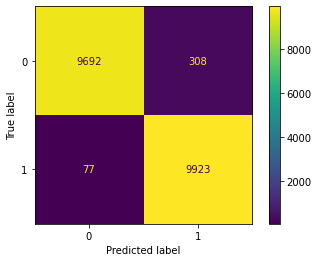

In [ ]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,y_pred > 0.5,labels=[0,1]),display_labels=[0,1]).plot(values_format='.5g')
plt.show()

# ShallowNet

https://github.com/shahroztariq/ShallowNet

In [ ]:
# Clone github
!git clone https://github.com/shahroztariq/ShallowNet.git

Cloning into 'ShallowNet'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras import regularizers, Model
from tensorflow.keras.optimizers import Adam
def shallowNetv3(model_input):
    # block 1
    x = Conv2D(32, (5, 5), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.0001))(model_input)
    x = Dropout(0.25)(x)
    x = Conv2D(32, (1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32, (1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    # block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, (1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, (1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)
    # block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32, (1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = Dropout(0.25)(x)
    # block 4
    x = Flatten()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(model_input, x, name='shallowNetv3')
    return model

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = shallowNetv3(tf.keras.Input(shape=(256,256,3)))
# compile the model (should be done *after* setting layers to non-trainable)
opt = Adam(lr=0.001, decay = 1e-6, beta_1=0.9, beta_2=0.999, amsgrad=False)

# we need to recompile the model for these modifications to take effect
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

model.summary()

In [ ]:
# Directory for saving weights
!mkdir /content/ckpt/

In [ ]:
opt = Adam(lr=0.001, decay = 1e-8, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model = shallowNetv3(tf.keras.Input(shape=(256,256,3)))
# compile the model (should be done *after* setting layers to non-trainable)
opt = Adam(lr=0.001, decay = 1e-6, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.load_weights('/content/drive/MyDrive/shallownetv3/05-0.92.hdf5')

# we need to recompile the model for these modifications to take effect
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Callbacks for saving weights
checkpoint_filepath = '/content/ckpt/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_filepath,"{epoch:02d}-{accuracy:.2f}"+".hdf5"),
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
   

# history = model.fit(train_gen,
#           epochs = 5,
#           validation_data=valid_gen,
#           callbacks=[model_checkpoint_callback],
#           steps_per_epoch=30,
#         #   validation_steps=int(total_train/64),
#           verbose=1)

In [ ]:
model.save_weights('shallowv3.hdf5')

In [ ]:
# Test
test_gen = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(
    '/content/real_vs_fake/real-vs-fake/test/',
    target_size = (256,256),
    class_mode = 'categorical',
    batch_size = 64,
    shuffle=False
)

y_pred = model.predict(test_gen)
y_test = test_gen.classes

Found 20000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
test_gen.class_indices

{'fake': 0, 'real': 1}

In [ ]:
print(sum(y_pred < 0.5))

[10110]


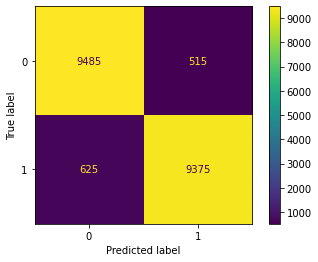

In [ ]:
from sklearn import metrics
conf = metrics.confusion_matrix(y_test,y_pred > 0.5)
metrics.ConfusionMatrixDisplay(conf,display_labels=[0,1]).plot(values_format='.5g')
plt.show()

In [ ]:
# Conf matrix train set
y_pred = model.predict_generator(train_gen)
y_test = train_gen.classes

conf = metrics.confusion_matrix(y_test,y_pred[:,1] > 0.5)
metrics.ConfusionMatrixDisplay(conf,display_labels=[0,1]).plot(values_format='.5g')
plt.show()

In [ ]:
# Function for image preprocessing
!pip install mtcnn
from mtcnn import MTCNN
from PIL import Image, ImageOps
detector = MTCNN()
def preprocess(filename, required_size=(256, 256),detector=detector):
    # load image from file
    image = Image.open(filename)
    image = ImageOps.exif_transpose(image)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # image = image.resize(required_size)
    # display(image)
    # convert to array
    pixels = np.asarray(image)
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # print(results)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    display(image)
    face_array = np.asarray(image)
    
    # preprocess array for input
    input = face_array.copy()
    input = input.astype('float32')
    m, s = input.mean(), input.std()
    input = (input-m)/s
    return np.expand_dims(input,axis=0)

In [ ]:
# Input image and test
img = preprocess('/content/drive/MyDrive/images/papa.jpg')
model.predict(img)